In [49]:
%tensorflow_version 1.x"

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x"`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [50]:

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical#for one  hot encoding
from keras.datasets import cifar10
import tensorflow as tf
from IPython.display import clear_output

In [51]:

(x_train,y_train),(x_test,y_test) = cifar10.load_data()     #loading the data

In [52]:
y_train = to_categorical(y_train,10) #one hoting y_train

In [53]:
tf.test.gpu_device_name()     #testing the run type

'/device:GPU:0'

In [54]:

print("x_train",x_train.shape)
print("y_train",y_train.shape)

x_train (50000, 32, 32, 3)
y_train (50000, 10)


In [55]:
tf.compat.v1.reset_default_graph()
x_ph = tf.placeholder(tf.float32,shape = [None,32,32,3]) #(32,32,3) image dimensions
y_ph= tf.placeholder(tf.float32,shape =  [None,10]) #here 10 indicates classes for each image like in the point of x_ph the each_image_dimensions will be of(32,32,3) like that y_ph is also be having 10 classes of different images



In [56]:
F_1 = tf.get_variable("F_1",shape = [7,7,3,100],initializer = tf.contrib.layers.xavier_initializer())
F_2 = tf.get_variable("F_2",shape = [5,5,100,100],initializer = tf.contrib.layers.xavier_initializer())
F_3 = tf.get_variable("F_3",shape = [3,3,100,100],initializer = tf.contrib.layers.xavier_initializer())


In [57]:
conv1 = tf.nn.conv2d(x_ph,F_1,strides = [1,1,1,1],padding = 'SAME')
l1out = tf.nn.relu(conv1)
l1out = tf.nn.max_pool(l1out,ksize = [1,1,1,1],padding ="SAME",strides = [1,1,1,1])
conv2 = tf.nn.conv2d(l1out,F_2,strides = [1,1,1,1],padding = "SAME")
l2out = tf.nn.relu(conv2)
l2out = tf.nn.max_pool(l2out,ksize = [1,2,2,1],padding ="SAME",strides = [1,1,1,1])
conv3 = tf.nn.conv2d(l2out,F_3,strides = [1,1,1,1],padding = 'SAME')
l3out = tf.nn.relu(conv3)
l3out = tf.nn.max_pool(l3out,ksize=[1,2,2,1],padding='SAME',strides=[1,2,2,1])
l4out = tf.contrib.layers.flatten(l3out)
l4out = tf.layers.dense(l4out,units=1000,activation=tf.nn.tanh,kernel_initializer=tf.contrib.layers.xavier_initializer())
finalout = tf.layers.dense(l4out,units=10,activation=tf.nn.softmax,kernel_initializer=tf.contrib.layers.xavier_initializer())
#dense  = dense layer is just a normal neural network layer,whatever we will be inputting in dense it will be taking 


In [58]:

print("x_ph",x_ph.shape)
print("y_ph",y_ph.shape)
print("l1out",l1out.shape)
print("l2out",l2out.shape)
print("l3out",l3out.shape)
print("l4out",l4out.shape)
print("finalout",finalout.shape)

x_ph (?, 32, 32, 3)
y_ph (?, 10)
l1out (?, 32, 32, 100)
l2out (?, 32, 32, 100)
l3out (?, 16, 16, 100)
l4out (?, 1000)
finalout (?, 10)


In [59]:
cost = tf.reduce_mean((finalout - y_ph)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
minimizer = optimizer.minimize(cost)
Init = tf.global_variables_initializer()
S = tf.Session()
S.run(Init)


error: 0.0126034655
itertions 7999


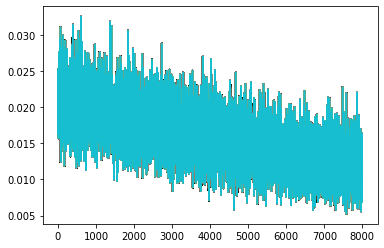

In [78]:
error  = []
BATCH_SIZE = 100
iterations = 8000
for i in range(iterations):
  random_indices = np.random.randint(0,len(x_train),size = BATCH_SIZE)
  FD = {x_ph: x_train[random_indices],y_ph:y_train[random_indices]}
  S.run(minimizer,feed_dict =FD)
  #ajay = S.run(cost,feed_dict = FD)
  error.append(S.run(cost,feed_dict = FD))
  clear_output(True)
  print("error:",S.run(cost,feed_dict = FD))
  print("itertions",i)
  plt.plot(error)
plt.show()
  

In [79]:

predictions = np.argmax(S.run(finalout,feed_dict = {x_ph:x_test,y_ph:to_categorical(y_test, num_classes = 10)}),axis = 1)

In [80]:

from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(predictions,y_test)*100,"%")

Accuracy:  64.77000000000001 %


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([64.27, 64.37, 64.47, 64.57, 64.67, 64.77, 64.87, 64.97, 65.07,
        65.17, 65.27]),
 <a list of 10 Patch objects>)

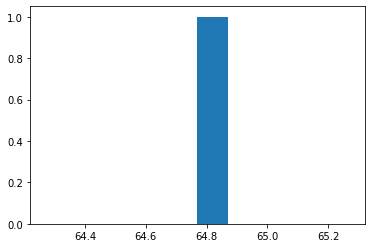

In [82]:
plt.hist(accuracy_score(predictions,y_test)*100)

Our simple CNn has achieved a test accuracy of over 64.77% with tensorflow not bad , For another CNN style, see an example using the Keras.